##3.	Title:  Data analysis of onion retail prices from Govt of India data home page

In [20]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [21]:
#Loading a dataset
data=pd.read_csv("daily_onion_report.csv")

In [22]:
# data describe
data.describe()

,Price
count,115991.000000
mean,16.224441
std,11.276851
min,2.000000
25%,9.000000
50%,13.000000
75%,20.000000
max,100.000000


In [23]:
# 5 rows of data
data.head()

,Date,Centre_Name,Commodity_Name,Price
0,25-11-97,DELHI,Onion,8.0
1,25-11-97,SHIMLA,Onion,7.0
2,25-11-97,LUCKNOW,Onion,5.0
3,25-11-97,AHMEDABAD,Onion,6.0
4,25-11-97,BHOPAL,Onion,8.0


In [24]:
#finding null values in the data
data.isnull().sum()

Date                  0
Centre_Name           0
Commodity_Name        0
Price             11920
dtype: int64

In [25]:
#Removing null values from data 
#We can also replace nan values if we are building a machine learning model
data.dropna(inplace=True)

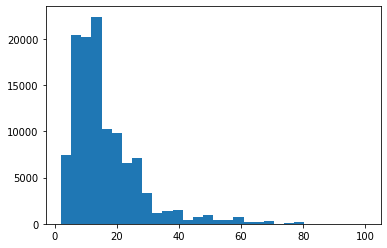

In [26]:
#Histogram plot of price 
plt.hist(data["Price"],bins=30)
plt.show()
#hightest rate frequecy is between 10 to 16

In [27]:
#Getting the year from the date 
from datetime import datetime
data['Date'] = pd.to_datetime(data['Date'])
data['year'] = pd.DatetimeIndex(data['Date']).year

In [28]:
data.head()

,Date,Centre_Name,Commodity_Name,Price,year
0,1997-11-25,DELHI,Onion,8.0,1997
1,1997-11-25,SHIMLA,Onion,7.0,1997
2,1997-11-25,LUCKNOW,Onion,5.0,1997
3,1997-11-25,AHMEDABAD,Onion,6.0,1997
4,1997-11-25,BHOPAL,Onion,8.0,1997


## Creating new dataframe to get the corelation between each City year wise

In [29]:
# Getting unique city name from main dataframe
new_data=pd.DataFrame(data["Centre_Name"].unique(),columns=["City"])
new_data=new_data.set_index("City")

In [30]:
new_data

""
City
DELHI
SHIMLA
LUCKNOW
AHMEDABAD
BHOPAL
...
WAYANAD
HALDWANI
DHARAMSHALA


In [31]:
#datatype of year
data["year"].dtypes

dtype('int64')

###Calculating mean price of a city for each year, to get the price co relation between city price


In [32]:
# To understand the price comparision between cities with respect to year we will find mean price for each year for each city and try 
#to get the co-relation between city price  
for i in data["year"].unique():
  city_wise_data=data[data["year"]==i]
  city=city_wise_data.groupby(["Centre_Name"])["Price"].mean()
  city=city.to_dict()
  for key,value in city.items():
    new_data.loc[key,i]=value
  


In [33]:
#There are some City which was not included in this dataset in initial years so there will many nan values
new_data=new_data.fillna(0) #converting nan values to 0
new_data.tail()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
City,,,,,,,,,,,,,,,,,,,
WAYANAD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.253968
HALDWANI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.000000
DHARAMSHALA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.181818
MANGALORE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.000000
MYSORE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.705882


In [34]:
#Year wise corelation 
new_data.corr()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1997,1.000000,0.964908,0.948904,0.942196,0.944246,0.951216,0.953825,0.933222,0.966620,0.563389,0.738401,0.679823,0.763600,0.278438,0.409685,0.297453,0.297439,0.242322,0.132502
1998,0.964908,1.000000,0.992915,0.985010,0.991077,0.991752,0.988038,0.987776,0.985501,0.608365,0.753523,0.728911,0.789805,0.320162,0.441010,0.332496,0.327227,0.296652,0.194132
1999,0.948904,0.992915,1.000000,0.994839,0.994137,0.993461,0.981741,0.985135,0.970727,0.613418,0.747721,0.734390,0.787169,0.333075,0.454698,0.350834,0.341296,0.320592,0.231055
2000,0.942196,0.985010,0.994839,1.000000,0.994019,0.994538,0.982971,0.984173,0.971362,0.618349,0.749516,0.737680,0.789894,0.342218,0.470692,0.366966,0.356925,0.334051,0.250688
2001,0.944246,0.991077,0.994137,0.994019,1.000000,0.997493,0.990832,0.995366,0.979333,0.621250,0.751192,0.740409,0.789767,0.338955,0.463316,0.356244,0.345494,0.325026,0.234308
2002,0.951216,0.991752,0.993461,0.994538,0.997493,1.000000,0.992566,0.992006,0.986337,0.619317,0.756477,0.736947,0.791828,0.335275,0.462678,0.351630,0.345355,0.320613,0.230584
2003,0.953825,0.988038,0.981741,0.982971,0.990832,0.992566,1.000000,0.992355,0.992790,0.616512,0.759494,0.738035,0.794359,0.331418,0.458982,0.347286,0.339927,0.311746,0.218147
2004,0.933222,0.987776,0.985135,0.984173,0.995366,0.992006,0.992355,1.000000,0.982084,0.619821,0.750711,0.741655,0.789938,0.336353,0.459281,0.350762,0.340291,0.320550,0.224897
2005,0.966620,0.985501,0.970727,0.971362,0.979333,0.986337,0.992790,0.982084,1.000000,0.604024,0.760826,0.721275,0.790141,0.314708,0.445889,0.327005,0.328549,0.286219,0.185309
2006,0.563389,0.608365,0.613418,0.618349,0.621250,0.619317,0.616512,0.619821,0.604024,1.000000,0.890921,0.977607,0.940014,0.382420,0.448983,0.300705,0.305830,0.224957,0.074243


In [35]:
# Transoposing the data to get the City wise correlation
new_data=new_data.T

In [36]:
#City wise corelation 
new_data.corr(method="pearson")

City,DELHI,SHIMLA,LUCKNOW,AHMEDABAD,BHOPAL,MUMBAI,JAIPUR,BHUBANESHWAR,KOLKATA,GUWAHATI,SHILLONG,AIZWAL,AGARTALA,BENGALURU,T.PURAM,CHENNAI,HYDERABAD,PATNA,CHANDIGARH,SRINAGAR,JAMMU,AMRITSAR,LUDHIANA,DEHRADUN,RAIPUR,RANCHI,KOHIMA,KANPUR,RAJKOT,VIJAYWADA,DINDIGUL,HISAR,KARNAL,MANDI,BATHINDA,INDORE,NAGPUR,ITANAGAR,DHARWAD,VARANASI,AGRA,BHAGALPUR,CUTTACK,SAMBALPUR,DIMAPUR,THIRUCHIRAPALLI,SILIGURI,JODHPUR,ERNAKULAM,PORT BLAIR,PUDUCHERRY,KOTA,GWALIOR,JABALPUR,KOZHIKODE,ROURKELA,VISAKHAPATNAM,PANAJI,PANCHKULA,GURGAON,REWA,COIMBATORE,TIRUNELVELI,SAGAR,PURNIA,THRISSUR,PALAKKAD,WAYANAD,HALDWANI,DHARAMSHALA,MANGALORE,MYSORE
City,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DELHI,1.000000,0.989086,0.971665,0.972849,0.966614,0.988543,0.963624,0.984623,0.964740,0.964507,0.963777,0.946230,0.982104,0.976853,0.942241,0.974859,0.988103,0.962775,0.914147,0.879581,0.885810,0.888330,0.896912,0.905487,0.890567,0.885392,-0.014193,0.917832,0.862580,0.893106,0.897113,0.869709,0.904516,0.891025,0.894238,0.844599,0.868594,0.675568,0.870645,0.897890,0.912773,0.884103,0.873250,0.865222,0.871117,0.843674,0.883978,0.850040,0.854153,0.840239,0.844272,0.859931,0.837723,0.853436,0.744729,0.866005,0.870388,0.868233,0.585638,0.579114,0.574518,0.580009,0.581310,0.555633,0.581088,0.456847,0.456847,0.456847,0.456847,0.456847,0.456847,0.456847
SHIMLA,0.989086,1.000000,0.988124,0.987668,0.973096,0.991649,0.975535,0.990271,0.973060,0.974448,0.958668,0.942215,0.987102,0.975824,0.952822,0.982921,0.981364,0.975594,0.895140,0.868455,0.880411,0.885692,0.895242,0.896143,0.879095,0.890410,-0.003949,0.908731,0.865758,0.873729,0.903677,0.888419,0.899008,0.894245,0.891606,0.866742,0.873958,0.708528,0.879424,0.896880,0.903639,0.889511,0.875434,0.870751,0.870330,0.850305,0.878528,0.862513,0.840309,0.800488,0.814965,0.840563,0.812349,0.836841,0.713481,0.852990,0.843496,0.842164,0.492375,0.489013,0.486199,0.489532,0.490265,0.473408,0.490142,0.365177,0.365177,0.365177,0.365177,0.365177,0.365177,0.365177
LUCKNOW,0.971665,0.988124,1.000000,0.980774,0.961395,0.985066,0.962561,0.978443,0.952526,0.953040,0.953973,0.941927,0.973896,0.972464,0.951653,0.977746,0.956393,0.960873,0.899061,0.875704,0.894333,0.907394,0.911016,0.905073,0.890927,0.897227,0.010300,0.895215,0.854758,0.849293,0.890397,0.877032,0.876585,0.875163,0.872742,0.863104,0.854365,0.743113,0.863790,0.876839,0.881506,0.869766,0.855908,0.852389,0.857911,0.832132,0.851677,0.856102,0.837901,0.777340,0.795548,0.827172,0.794905,0.820631,0.693452,0.836701,0.817901,0.820881,0.455880,0.459625,0.460415,0.459354,0.458866,0.458550,0.458958,0.276969,0.276969,0.276969,0.276969,0.276969,0.276969,0.276969
AHMEDABAD,0.972849,0.987668,0.980774,1.000000,0.954070,0.984748,0.962902,0.976947,0.968191,0.961691,0.945063,0.943912,0.977271,0.968513,0.937280,0.986669,0.966413,0.965043,0.889999,0.859840,0.878710,0.881851,0.886629,0.893037,0.876262,0.892738,0.061876,0.903165,0.868288,0.865038,0.898548,0.894449,0.893204,0.899880,0.890452,0.880800,0.878457,0.758038,0.880749,0.898851,0.894610,0.899543,0.880896,0.877475,0.875858,0.856838,0.882999,0.867118,0.819816,0.796973,0.812091,0.842234,0.810248,0.833349,0.708073,0.849293,0.833455,0.837398,0.491710,0.496249,0.497348,0.495903,0.495291,0.496063,0.495405,0.294288,0.294288,0.294288,0.294288,0.294288,0.294288,0.294288
BHOPAL,0.966614,0.973096,0.961395,0.954070,1.000000,0.971404,0.976170,0.987292,0.985981,0.966526,0.978958,0.878737,0.985146,0.955083,0.927138,0.966871,0.951325,0.984181,0.843349,0.812563,0.830041,0.839334,0.850111,0.842191,0.827378,0.825346,-0.085626,0.852551,0.797579,0.808036,0.839314,0.817433,0.827869,0.816793,0.819950,0.793917,0.798818,0.660416,0.807692,0.821298,0.837318,0.810143,0.797238,0.791762,0.803704,0.769995,0.797471,0.790815,0.825236,0.774394,0.788574,0.809132,0.787365,0.806629,0.702480,0.810129,0.798454,0.798627,0.462001,0.461094,0.459567,0.461335,0.461640,0.450835,0.461592,0.322610,0.322610,0.322610,0.322610,0.322610,0.322610,0.322610
...,...,...,...,...,..

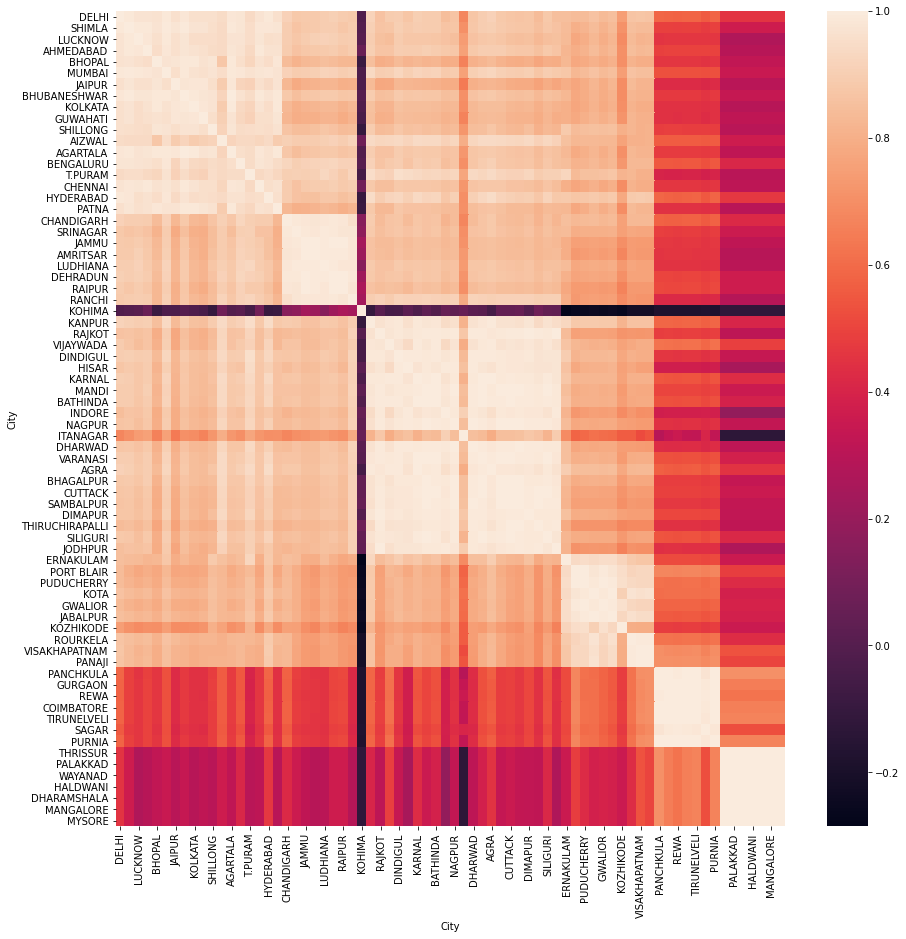

In [37]:
# Heatmap to show the corelation between the city onion prices 
plt.figure(figsize=(15,15))
corr=new_data.corr()
sn.heatmap(new_data.corr())
plt.show()

## Maximum price of onion  

In [38]:
max(data["Price"]) ## 100 is the maximum price

100.0

In [39]:
# maximum onion price CITY
data[data["Price"]==max(data["Price"])]["Centre_Name"] ##AIZWAL is the only city where maximum onion price is maximum(100rs) 

105648    AIZWAL
105933    AIZWAL
105990    AIZWAL
106047    AIZWAL
106104    AIZWAL
106161    AIZWAL
106218    AIZWAL
106275    AIZWAL
106332    AIZWAL
106446    AIZWAL
106560    AIZWAL
106617    AIZWAL
106674    AIZWAL
106845    AIZWAL
106902    AIZWAL
106959    AIZWAL
107016    AIZWAL
107073    AIZWAL
Name: Centre_Name, dtype: object

In [40]:
# Max price of each city
max_price=data.groupby(["Centre_Name"])["Price"].max()
max_price=max_price.to_dict()

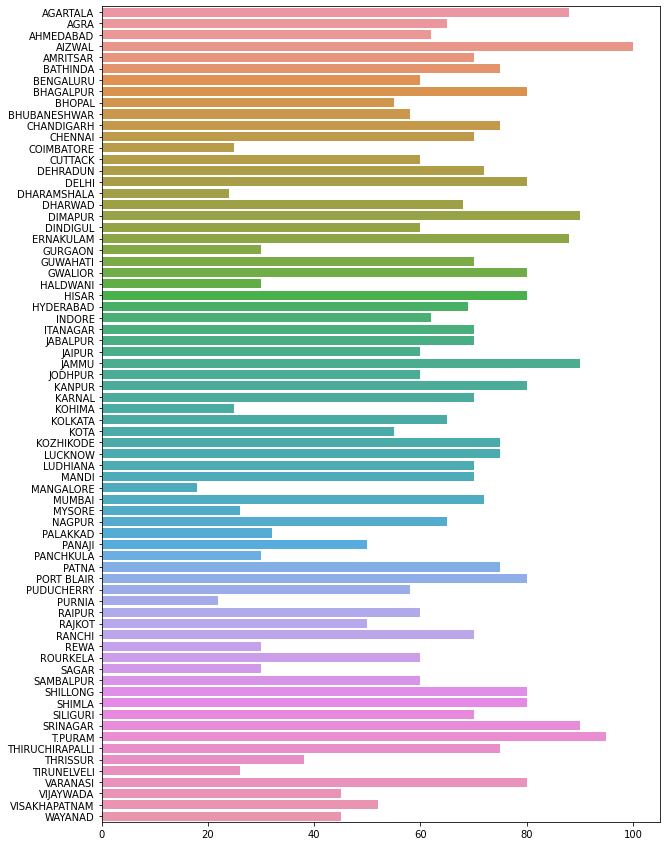

In [43]:
# Barplot to see the maximum price of each city
x = list(max_price.keys())
y = list(max_price.values())
plt.figure(figsize=(10,15))
sn.barplot(x=y,y=x)
plt.show()

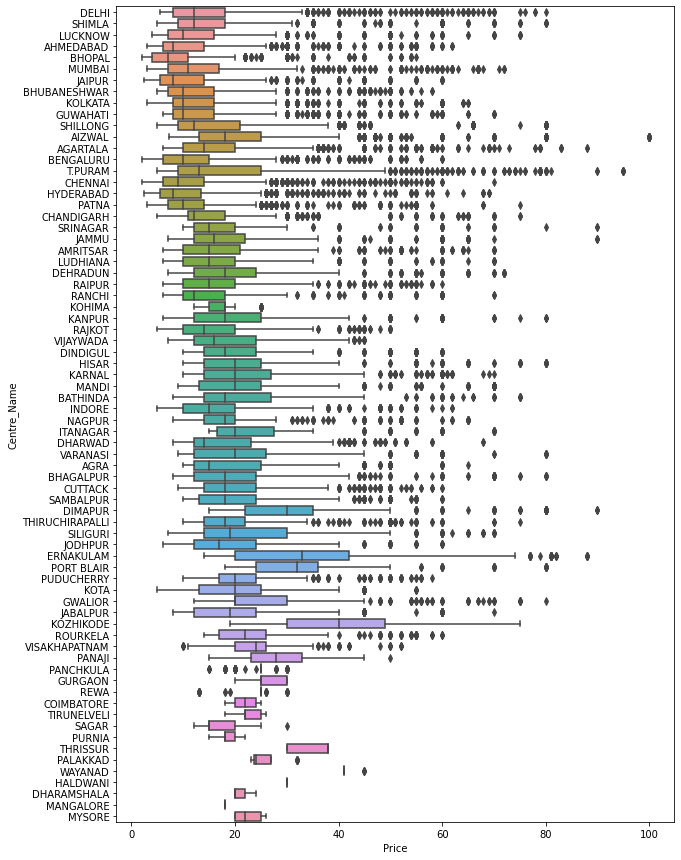

In [42]:
#Box plot to find the outlier in onion price for some cities 
fig_dims = (10, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sn.boxplot(x='Price',y='Centre_Name',data=data.iloc[:,:],ax=ax)
plt.show()